# Sprint4課題 機械学習スクラッチ - ロジスティック回帰

# 課題の目的

- スクラッチを通してロジスティック回帰を理解する
- 分類問題についての基礎を学ぶ

### 進め方

1. 問題を理解（言語化、構造化）して、アウトプット（出力）を明確にする

2. 実装する

3. 検証する


<気をつけること>
- 一度に全てを作らない。小さく積み上げる（少し作る → 動作を検証する → エラーを修正 →　少し作る ...を繰り返す）。


- 行列演算のエラーを早期発見できるようにshapeをprintする関数を入れておく。


- shapeが不定形（n ,）の場合は、reshape(-1, 1)するか、[:, newaxis]で（n, 1）行列にすること。（特に目的変数）


- メソッドを定義する際に、Parameters, Returnsの定義を記載する。


- 関数名は命名規則にしたがう： [Python命名規則一覧](https://pep8-ja.readthedocs.io/ja/latest/)


    - 名前は小文字のみにして、読みやすくするために必要に応じて単語をアンダースコアで区切る。
    
    - インスタンスメソッドのはじめの引数の名前は常に self を使う。
    
    - クラスメソッドのはじめの引数の名前は常に cls を使う。
    
    - 公開されていないメソッドやインスタンス変数にだけ、アンダースコアを先頭に付ける。

# 【問題1】ロジスティック回帰のクラスを作成する

- ロジスティック回帰のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。

- クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchLogisticRegressionとしてください。

- メソッドやパラメータなどはscikit-learnを参考にしてください。推定関係ではラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

 [sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


- 検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとし
てまとめてください。

### 必要なメソッド

1. 予測（predict） => 出力：予測値


2. 学習(fit) => 出力：パラメータ、学習曲線（MSEデータセット）
    - 学習とは？ ： 所定のルールに従った（関数を用いて）パラメータの更新を繰り返すこと。（forループ）


3. 学習に必要な関数
    - 仮定関数
    - シグモイド関数
    - 目的関数
    - 最急降下法（パラメータ更新） => 目的関数の最小化問題の解から導かれる


4. 入力値
    - X：特徴量（n_samples, n_fetures）
    - $θ$：パラメータ（n_fetures）
    - y：目的変数（n_samples）

- 合計する際は、スカラーを返すnp.sum()を用いること。
- 合計する際に、組み込み関数sum()を用いるとarrayが返ってくるため使わない。

In [1]:
import sys

sys.path.append('/Users/makintosh/diveintocode-term1/ml-scratch')

from utils.ScratchLogisticRegression import ScratchLogisticRegression

### データセットの準備

- irisデータを用いる。 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# データセット
iris = load_iris()

# データフレームに格納
df_iris = pd.DataFrame(load_iris().data, columns = load_iris().feature_names)
df_iris["target"] = load_iris().target
#df_iris["target_names"] = load_iris().target_names

# 出力
print(df_iris.columns.values)
print(df_iris.info())

['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'target']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
None


In [4]:
# targetから1("versicolor")、2("virsinica")を抽出し、2値分類に用いる

df = df_iris[df_iris["target"] != 0]

In [5]:
# 説明変数、目的変数に分解
# 説明変数はpetal length, petal widthを用いる

X_df = df.drop(['sepal length (cm)', 'sepal width (cm)', "target"], axis = 1)
y_df = df["target"]

In [6]:
# 学習用データ、検証用データを作成する
X_train, X_test, y_train, y_test = train_test_split(X_df.values, y_df.values, random_state = 2)

# shapeの確認
print("X_train.shape : {}".format(X_train.shape))
print("X_test.shape : {}".format(X_test.shape))
print("y_train.shape : {}".format(y_train.shape)) 
print("y_test.shape  : {}".format(y_test.shape)) 

X_train.shape : (75, 2)
X_test.shape : (25, 2)
y_train.shape : (75,)
y_test.shape  : (25,)


In [7]:
y_test

array([2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 2])

In [8]:
# 説明変数を標準化する
scaler = StandardScaler() # インスタンス生成

# フィッティング
scaler.fit(X_train)

# 標準化
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## 検証：バイアスなし

- 問題３以降ではバイアス無しのモデル、予測結果を用いる。

In [9]:
# バイアス無し
LR_no_bias_true = ScratchLogisticRegression(no_bias = True)

# フィッティング
LR_no_bias_true.fit(X_train_std, y_train, X_test_std, y_test)

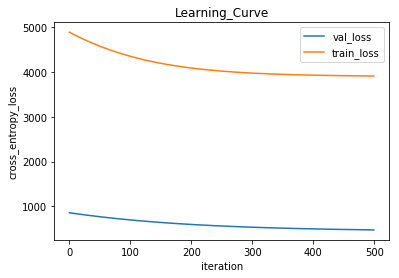

In [10]:
# 学習曲線を表示
#print(LR_no_bias_true.val_loss)
LR_no_bias_true.show_learning_curve()

検証データに基づき算出した損失も学習の経過と共に減少しており、学習が適切に行われていることを確認した。

In [11]:
# 検証データの正解値に対する予測確率
y_pred_prob_no_bias = LR_no_bias_true.predict_prob(X_test_std)

# 検証データの予測値を出力
y_pred_no_bias = LR_no_bias_true.predict(X_test_std)

# データフレームを作成
df_y_pred = pd.DataFrame(y_pred_no_bias, columns=["y_pred_no_bias"])
df_y_pred["y_test"] = y_test

# 出力
df_y_pred

,y_pred_no_bias,y_test
0,1,2
1,1,1
2,1,2
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


## 検証：バイアスあり

In [12]:
# インスタンスオブジェクト生成
LR_no_bias_false = ScratchLogisticRegression(no_bias = False)

# 学習
LR_no_bias_false.fit(X_train_std, y_train, X_test_std, y_test)

# 予測
y_pred_with_bias = LR_no_bias_false.predict(X_test_std)

# データフレームを作成
df_y_pred = pd.DataFrame(y_pred_with_bias, columns=["y_pred_with_bias"])
df_y_pred["y_test"] = y_test

# 出力
df_y_pred

,y_pred_with_bias,y_test
0,1,2
1,1,1
2,1,2
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


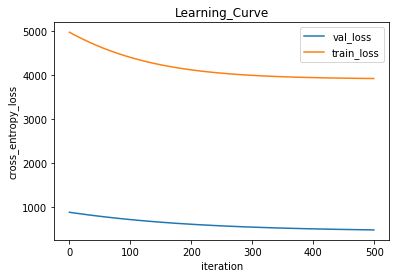

In [13]:
# 学習曲線
LR_no_bias_false.show_learning_curve()

検証データに基づき算出した損失も学習の経過と共に減少しており、学習が適切に行われていることを確認した。

# 【問題2】学習曲線のプロット

学習曲線をプロットしてください。

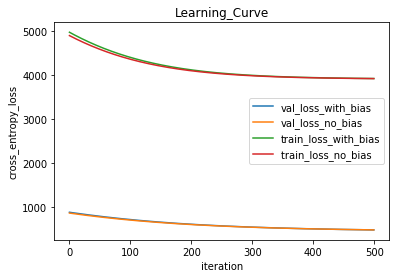

In [14]:
import matplotlib.pyplot as plt

# クロスエントロピー損失
train_loss_with_bias = LR_no_bias_false.train_loss # 学習用データ、バイアスあり
train_loss_no_bias = LR_no_bias_true.train_loss     # 学習用データ、バイアス無し
val_loss_with_bias = LR_no_bias_false.val_loss       # 検証用データ、バイアスあり
val_loss_no_bias = LR_no_bias_true.val_loss           # 検証用データ、バイアス無し

# グラフに描画
if val_loss_with_bias.all() != 0:
    plt.plot(val_loss_with_bias, label="val_loss_with_bias")

if val_loss_no_bias.all() != 0:
    plt.plot(val_loss_no_bias, label="val_loss_no_bias")

plt.plot(train_loss_with_bias, label="train_loss_with_bias")
plt.plot(train_loss_no_bias, label="train_loss_no_bias ")

plt.xlabel("iteration")
plt.ylabel("cross_entropy_loss")
plt.title("Learning_Curve")
plt.legend()
plt.show()

# 【問題3】指標値の算出

分類に関する指標値で精度を確認してください。

### 分類に関する指標値

- 正解率（accuracy）
- 適合率（precision_xcore）
- 検出率（recall_score）
- F値（f-score）
- auc

In [15]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

In [16]:
# 評価
print("accuracy : {}".format(round(accuracy_score(y_test, y_pred_no_bias),2))) # 正解率
print("precision : {}".format(round(precision_score(y_test, y_pred_no_bias),2))) # 適合率
print("recall : {}".format(round(recall_score(y_test, y_pred_no_bias),2)))      # 検出率
print("f1_score : {}".format(round(f1_score(y_test, y_pred_no_bias),2)))   #  f1-score

accuracy : 0.84
precision : 0.8
recall : 1.0
f1_score : 0.89


auc : 0.78


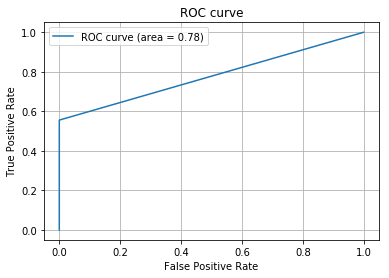

In [17]:
"""
予測値に基づくROC curve
"""

# AUC(Compute Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_no_bias, pos_label = 2)
auc = metrics.auc(fpr, tpr)
print("auc : {}".format(round(auc,2)))

# 可視化
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

auc : 0.9305555555555556


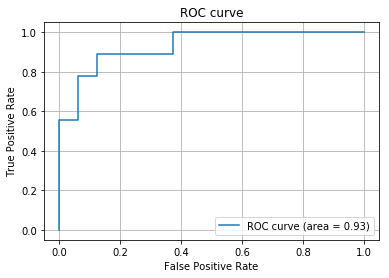

In [18]:
"""
予測確率に基づくROC curve
"""
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_no_bias, pos_label = 2)
auc = metrics.auc(fpr, tpr)

# aucを出力
print("auc : {}".format(auc))


# ROC Curveを出力
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

# 【問題4】決定領域の可視化

2値分類のデータセットに対して決定領域を可視化してください。

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

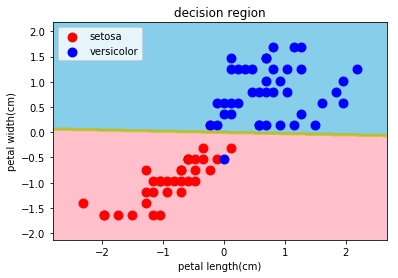

In [20]:
decision_region(X_train_std, y_train, LR_no_bias_true, xlabel = "petal length(cm)", ylabel = "petal width(cm)")

# 【問題5】（アドバンス課題）重みの保存

検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやnumpy.savezを利用します。

[pickle — Python オブジェクトの直列化 — Python 3.7.1 ドキュメント](https://docs.python.org/ja/3/library/pickle.html)

[numpy.savez — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.savez.html#numpy.savez)

### numpy.savezについて

- １つのファイルに.npzフォーマットで配列を格納する(Save several arrays into a single file in uncompressed .npz format.)

In [21]:
# 公式ドキュメントに記載のサンプルを実行してみる
from tempfile import TemporaryFile

# インスタンス生成
outfile = TemporaryFile()

# 変数
x = np.arange(10)
y = np.sin(x)

# savez()メソッドでoutfileオブジェクトにx, yを保存
np.savez(outfile, x, y)

# simulate closing & reopening file
outfile.seek(0)

npzfile = np.load(outfile)

print(npzfile.files)

print(npzfile["arr_0"])
print(npzfile["arr_1"])

['arr_0', 'arr_1']
[0 1 2 3 4 5 6 7 8 9]
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]


- 学習用データ => 学習 => 重み（パラメータ） => 格納

In [22]:
# 一時ファイルのインスタンス生成
outfile = TemporaryFile()

# 学習により算出された重み
coef = LR_no_bias_true.coef

# outfileオブジェクトに重みを保存 (一時ファイル, 配列名 = 値)
np.savez(outfile, no_bias_true = coef)

# seek()メソッドで先頭行に戻る
outfile.seek(0)

# outfileオブジェクトを読み込み
coefficients = np.load(outfile)

# 一時ファイルに格納された配列を表示
print(coefficients.files)

# 配列名を指定し、重みを取得
coefficients["no_bias_true"]

['no_bias_true']


array([[0.00302764, 0.12843728]])

学習によって算出した重み（モデルのパラメーター）を一時ファイルに保存し、読み込むことが出来た。

# 【問題6】分類と回帰

最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

- 分類問題と回帰問題は本質的に何が異なっているか?

# 本課題からの学び

- スクラッチで線形回帰クラスを実装したことで、分類問題（問題定義、学習・予測のロジック）に対する理解が深まった。


- 今回のスクラッチではsprint3の学びを生かし、行列のshapeを都度出力、エラーが発生しないことを確認しながら進めたため、前回に比べて実装がスムーズだった。


- デバッグによる作業の非効率性は突き詰めれば、プログラムが巨大になるに連れてエラー発生箇所の検索時間が非線形的に増加することに起因する。


- その意味で「いかに多くのテストシナリオ（データ型・形状（shape）、引数、条件分岐など）を事前に想定できるか」が実装の効率性を左右すると思う。


- 他、インスタンス変数を書き換える際に、大元の引数の値は変わらない（インスタンス変数は元の引数のコピーであり、インスタンス変数を書き換えても元の引数は上書きされない）と思い込んで進めてしまい、エラーの原因となった。基本的事項に関する思い込みは気付くのに時間がかかるので、知っているつもりでも念を入れて、具体例に基づく検証を進めながら実装したい。


- サンプルを作る際に、リターンと関数名を揃えてしまい、エラー（object is not callable.）が多発した。作業効率が著しく低下するので気をつけたい。

### 補足１：scikit-learnのLogisticRegressionを使うとどうなる？

In [29]:
from sklearn.linear_model import LogisticRegression

LR_origin = LogisticRegression()

LR_origin.fit(X_train_std, y_train)

y_pred_origin = LR_origin.predict(X_test_std)

# AUC(Compute Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_origin, pos_label = 2)
auc = metrics.auc(fpr, tpr)
print("auc : {}".format(round(auc,3)))

auc : 0.802


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 補足２：正解ラベルを（0, 1）に変換せずに学習させるとどうなるか？

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt

class ScratchLogisticRegression_no_binary():
    """
    ロジスティック回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
        イテレーション回数
        
    lr : float
        学習率
        
    lmd : float
        正則化パラメータ
    
    no_bias : bool
        バイアス項を入れない場合はTrue
    
    verbose : bool
        学習過程を出力する場合はTrue
    
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape(n_features,)
        パラメータ

    self.train_loss : 次の形のndarray, shape(self.iter,)
        学習用データに対する損失の記録
        
    self.val_loss : 次の形のndarray, shape(self.iter,)
        検証用データに対する損失の記録
        
    """
    
    # コンストラクタ
    def __init__(self, num_iter = 500, lr = 1e-2, lmd = 1, no_bias = True, verbose = False):
        
        # ハイパーパラメータを属性として記録
        self.iter = num_iter#イテレーション回数
        self.lr = lr#学習率
        self.lmd = lmd#正則化パラメータ
        self.no_bias = no_bias#バイアス項  True :　あり、False：なし
        self.verbose = verbose     # 学習過程の表示    True : あり、 False：なし 
        
        # 損失を記録する配列を用意
        self.train_loss = np.zeros(self.iter) # 学習用データに基づき計算した損失を記録
        self.val_loss = np.zeros(self.iter)    # 検証用データに基づき計算した損失を記録
        
        # パラメータベクトル
        self.coef = 1

    def fit(self, X, y, X_val = None, y_val = None):
        """
        シグモイド回帰を学習する
        
        Parameters
        ----------
        X : 次の形のndarray, shape (m_samples, n_features)
            学習用データの特徴量
            
        y : 次の形のndarray, shape (m_samples, )
            学習用データの正解値
        
        X_val : 次の形のndarray, shape (m_samples, n_features)
            検証用データの特徴量
            
        y_val : 次の形のndarray, shape (m_samples, )
        
        
        """
        
        if X.ndim == 1:
            X[:, np.newaxis] # １次元配列の場合、軸を追加する
        if y.ndim == 1:
            y[:, np.newaxis] # １次元配列の場合、軸を追加する
        

        # vervoseをTrueにした場合は学習過程を出力
        if self.verbose:
            print(self.train_loss)
            
        # バイアス項を入れる場合（no_bias = True）の場合、バイアス項を水平方向に連結する
        if self.no_bias == False:
            bias_term = np.ones(len(X)).reshape(-1, 1)  #  (m, 1)行列
            X = np.concatenate([bias_term, X], axis = 1) #  (m+1, n)行列
            
            if (X_val is not None) and (y_val is not None):
                bias_term = np.ones(len(X_val)).reshape(-1, 1)  #  (m, 1)行列
                X_val = np.concatenate([bias_term, X_val], axis = 1) #  (m+1, n)行列

        # パラメータベクトルをランダム関数で初期化
        np.random.seed(seed=0)
        self.coef = np.random.rand(X.shape[1]).reshape(1,-1)
        
       
        # 正解値のラベルをインスタンス変数に保存しておく（予測値の正解ラベルに使うため）
        self.y = y

        """
        # 正解ラベルの要素を(0,1)に変換する
        self.y_train = y.copy()
      
        for i in range(len(self.y_train)):

            if self.y_train[i] == min(y):
                self.y_train[i] = 0
            elif self.y_train[i] == max(y):
                self.y_train[i] = 1
                
        # 検証用データも同様に        
        if (X_val is not None) and (y_val is not None):
            self.y_val = y_val.copy()
            
            for i in range(len(self.y_val)):

                if self.y_val[i] == min(y_val):
                    self.y_val[i] = 0
                elif self.y_val[i] == max(y_val):
                    self.y_val[i] = 1
        """

        # 所定の試行回数だけ学習を繰り返す
        for i in range(self.iter):
            
            self.gradient_descent(X, y) # 最急降下法（パラメータ更新）
            
            train_loss = self.cross_entropy_loss(X, y) # 損失を計算
            
            self.train_loss[i] = train_loss # 配列に格納
            
            # vervoseをTrueにした場合は学習過程を出力
            if self.verbose:
                print("Train Loss in {0}th iteration : {1}".format(i, round(train_loss)))
                
            
            if (X_val is not None) and (y_val is not None):
                
                val_loss = self.cross_entropy_loss(X_val, y_val)              
                self.val_loss[i] = val_loss
                
                if self.verbose:
                    print("Valid Loss in {0}th iteration : {1}".format(i, round(val_loss)))
                    print("")
    
    
    def predict_prob(self, X):
        """
        予測値に対する確率を算出する
        
        Parameter
        ----------
        X : 次の形のndarray, shape(m_samples, n_features)
            特徴量
        
        
        Return
        ----------
        y_pred_prob : 次の形のndarray, shape (m_samples,)
            予測値の正解率
        
        """
        # バイアス項を入れる場合（no_bias = True）の場合、バイアス項を水平方向に連結する
        if self.no_bias == False:
            bias_term = np.ones(len(X)).reshape(-1, 1)  #  (m, 1)行列
            X = np.concatenate([bias_term, X], axis = 1) #  (m+1, n)行列
        
        y_pred_prob = self._sigmoid_hypothesis(X)
        
        return y_pred_prob
        
        
        
    def predict(self, X, threshold = 0.5):
        """
        分類ラベルの予測(0 or 1)を返す
        
        Parameter
        ----------
        X : 次の形のndarray, shape(m_samples, n_features)
            特徴量
            
        threshold : float
            閾値
        
        
        Return
        ----------
        y_pred : 次の形のndarray, shape (m_samples, )
            予測値
            
        """
            
        # 予測確率
        y_pred_prob = self.predict_prob(X) # no_bias = Falseの場合、Xのindexはm+1行
        
        # 正解ラベルの予測値をゼロで初期化
        y_pred = np.zeros(len(y_pred_prob)).reshape(-1,1) # (m,1)行列
        
        # y_predの各要素について、パラメータを更新する。
        for i in range(len(y_pred)):
            if y_pred_prob[i] < threshold:
                y_pred[i] = min(self.y) # 閾値を下回る場合、negative（正解ラベルのうち大きい値）
            else:
                y_pred[i] = max(self.y) # 閾値を上回る場合、positive（正解ラベルのうち小さい値）
                
        return y_pred.astype("int64")
        
        
    def sigmoid(self, z):
        """
        シグモイド関数
        
        Parameters
        ----------
        z : 次の形のndarray, shape(m_samples, 1_features)
            仮定関数
        
        
        Returns
        ----------
        prob : 
            シグモイド関数で算出した確率
            
        """
        
        prob = 1/(1 + np.exp(-z)) # 演算
        
        # sigmoid.reshape(-1, 1) # 出力されたベクトルの次元が不定の場合、reshapeする
        
        
        return prob
    
    

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数

        Parameters
        ----------
        X : 次の形のndarray, shape(m_samples, n_features)
            学習データ


        Returns
        ----------
            次の形のndarray, shape(m_samples, 1)
            線形の仮定関数による推定結果

        """
        # 仮定関数
        line_hypo = np.dot(X, self.coef.T)

        return line_hypo
    
   

    def _sigmoid_hypothesis(self, X):
        """
        シグモイド仮定関数

        Parameters
        ----------
        X : 次の形のndarray, shape(m_samples, n_features)
            学習データ


        Returns
        ----------
            次の形のndarray, shape(m_samples, 1)
            シグモイド形の仮定関数による推定結果

        """

        z = self._linear_hypothesis(X) # 線形和

        sig_hypo = self.sigmoid(z) # 予測確率

        return sig_hypo
    
    

    def regularization_term(self, X):
        """
        正則化項

        Parameters
        ----------
        X : 次の形のndarray, shape(m_samples, n_features)
            学習用データ

        coef : 次の形のndarray, shape(1_sample, n_features)
            パラメータベクトル

        lmd : int
            正則化パラメータ

        Returns
        ----------
        reg_term : float64
            正則化項

        """
        
        reg_term = self.lmd / len(X) * np.sum(self.coef ** 2)  # 正則化項

        return reg_term    
    
    
    def cross_entropy_loss(self, X, y):
        """
        クロスエントロピー損失を求める
        
        Parameters
        ----------
        X : 次の形のndarray, shape(m_samples, n_features)
            学習データ

        y : 次の形のndarray, shape(m_samples, 1_feature)
            正解値

        Returns
        ----------
        loss : float64
            損失

        """

        # 正則化項
        reg_term = self.regularization_term(X)
        #print("regularization_term.shape:{}".format(reg_term.shape))

        # シグモイド仮定関数
        sig_hypo = self._sigmoid_hypothesis(X) # 確率

        # 目的関数の第１項
        first_term = - y * np.log(sig_hypo)
        
        # 目的関数の第２項
        second_term = - (1 - y) * np.log(1- sig_hypo)

        # 目的関数の計算結果
        loss = np.sum(first_term + second_term + reg_term)

        return loss
    
    
    
    def gradient_descent(self, X, y):
        """
        最急降下法（パラメータの更新） 
        
        Parameters
        ----------
        X : 次の形のndarray, shape(m_sample, n_features)
            学習データ

        y ： 次の形のndarray, shape(m_sample, 1_feature)
            正解値


        Returns
        ----------
        coef : 次の形のndarray, shape(1_sample, n_features)
            パラメータベクトル

        """

        # シグモイド仮定関数
        sig_hypo = self._sigmoid_hypothesis(X)

        # 第1項
        grad_first_term =  np.dot(sig_hypo.T,  X) / len(X)
        
        # 第２項
        temp_coef = self.coef #演算用に用いるパラメータを作成
        
        if self.no_bias == False:
            temp_coef[0][0] = 0 # バイアスありの場合、バイアス項に対するパラメータ（θ）をゼロにする
        
        
        grad_second_term = self.lmd / len(X) * temp_coef
        grad_second_term = grad_second_term.reshape(1,-1)
        
        # パラメータ更新
        self.coef -= self.lr * (grad_first_term + grad_second_term)        
        
        
    def show_learning_curve(self,):
        """
        学習過程をグラフに描画
        
        """
        
        if self.val_loss.all() == 0:
            None
        else:
            plt.plot(self.val_loss, label="val_loss") # 検証用データによる交差エントロピー損失
        
        plt.plot(self.train_loss, label = "train_loss") # 学習用データによる交差エントロピー損失        
        plt.xlabel("iteration") 
        plt.ylabel("cross_entropy_loss")
        plt.title("Learning_Curve")
        plt.legend()
        plt.show()
        

In [25]:
# インスタンスオブジェクトを生成
LR_worse = ScratchLogisticRegression_no_binary()

# 学習
LR_worse.fit(X_train_std, y_train)

# 検証データの予測値を出力
y_pred_prob_worse = LR_worse.predict_prob(X_test_std)

# 検証データの予測値を出力
y_pred_worse = LR_worse.predict(X_test_std)

# データフレームを作成
data_worse = pd.DataFrame(y_pred_worse, columns=["y_pred"])
data_worse["y_test"] = y_test

# 出力
data_worse

,y_pred,y_test
0,1,2
1,1,1
2,1,2
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [26]:
print("accuracy : {}".format(round(accuracy_score(y_test, y_pred_worse),2))) # 正解率
print("precision : {}".format(round(precision_score(y_test, y_pred_worse),2))) # 適合率
print("recall : {}".format(round(recall_score(y_test, y_pred_worse),2)))      # 検出率
print("f1_score : {}".format(round(f1_score(y_test, y_pred_worse),2)))   #  f1-score

accuracy : 0.84
precision : 0.8
recall : 1.0
f1_score : 0.89


auc : 0.78


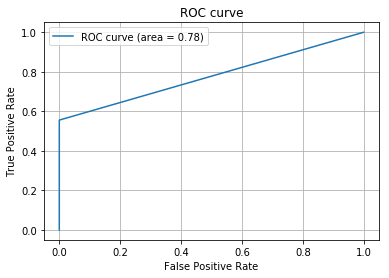

In [27]:
"""
予測値に基づくROC curve
"""

# AUC(Compute Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_worse, pos_label = 2)
auc = metrics.auc(fpr, tpr)
print("auc : {}".format(round(auc,2)))

# 可視化
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

auc : 0.9305555555555556


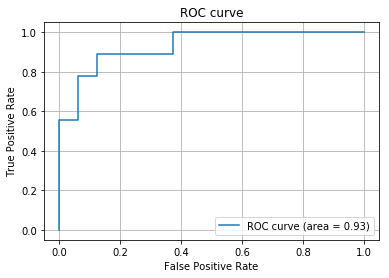

In [28]:
"""
予測確率に基づくROC curve
"""
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_worse, pos_label = 2)
auc = metrics.auc(fpr, tpr)

# aucを出力
print("auc : {}".format(auc))


# ROC Curveを出力
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

- バイアスを含めず、正解ラベルを(0,1)に変換するケースと変換しないケースを比較した場合、スコアリング、auc（及びROC curve）に変化は見られなかった。

- 交差エントロピー損失関数の特性から正解ラベルを(0, 1)に変換する必要があるのではないかと考えたが、変換しなくともモデルの予測精度に違いは生じないとの結論に達した。（交差エントロピー損失関数が下に凸の関数であることに起因すると思われる）

### 補足３：エントロピーについて

- 物理学：熱力学および統計力学において定義される示量性の状態量


- 情報理論:エントロピーは確率変数が持つ情報の量を表す尺度であり、"情報量"( ～～ということが起こる場合の数)とも呼ばれる。以下の3つの意味がある。

    - 情報の量 (Amount of Information)
    - 不確実性 (Uncertainty)
    - 圧縮の出来なさ (Incompressibility)
    
    [Wikipedia](https://ja.wikipedia.org/wiki/%E6%83%85%E5%A0%B1%E9%87%8F#.E5.B9.B3.E5.9D.87.E6.83.85.E5.A0.B1.E9.87.8F.EF.BC.88.E3.82.A8.E3.83.B3.E3.83.88.E3.83.AD.E3.83.94.E3.83.BC.EF.BC.89])


- 尚、以下の参照元で、「"エントロピー"とは"ゴミ"のことである」と端的に述べられており、馴染みやすい例えだと思った。

 [小学生でも分かるエントロピーの話](https://macasakr.sakura.ne.jp/entropy.html)

---
    - この部屋は散らかっているのでゴミが多い。

    - コーヒーにミルクを入れてかき混ぜたらゴミの様になった。

    - 経済系は生態系から資源、エネルギーを採取し、そして生態系へゴミを排出する。

    - 環境問題において重要なのは、ゴミを増加させない事だ。

    - 廃棄物の処分が出来なくなった時点、すなわちゴミが最大となったところで、経済成長は止まらざるを得なくなる。

    - 情報の価値を失うという事は、情報ゴミを受け取るという事である。
---